In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as udata
# import torchvision
# import torchvision.transforms as transforms
from torch.utils import data
import numpy as np

In [3]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
#         self.bn1 = torch.nn.BatchNorm1d(H)
#         self.bn2 = torch.nn.BatchNorm1d(H)
#         self.bn3 = torch.nn.BatchNorm1d(H)
#         self.bn4 = torch.nn.BatchNorm1d(H)
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, H)
        self.linear4 = torch.nn.Linear(H, H)
        self.linear5 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary (differentiable) operations on Tensors.
        """
        x = F.relu(self.linear1(x))
#         x = self.bn1(x)
        x = F.relu(self.linear2(x))
#         x = self.bn2(x)
        x = F.relu(self.linear3(x))
#         x = self.bn3(x)
        x = F.relu(self.linear4(x))
#         x = self.bn4(x)
        y_pred = self.linear5(x)
        return y_pred

    
class LinearNet(torch.nn.Module):
    def __init__(self, D_in, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(LinearNet, self).__init__()
        self.linear = torch.nn.Linear(D_in, D_out)
       

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary (differentiable) operations on Tensors.
        """
        y_pred = self.linear(x)
        return y_pred

    

class NLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(NLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        layer = []
        layer.append(self.linear1)
       

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary (differentiable) operations on Tensors.
        """
        y_pred = self.linear(x)
        return y_pred

In [4]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 500, 2, 10, 2

sy = 1e-2
# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
w = torch.randn(D_in, D_out)
y = torch.randn(N, D_out)*sy + x**3@w

x_test = torch.randn(1000, D_in)
y_test = torch.randn(1000, D_out)*sy + x_test**3@w

train_data = udata.TensorDataset(x, y)
train_loader = udata.DataLoader(train_data, batch_size=6, shuffle=True)
test_data = udata.TensorDataset(x_test, y_test)
test_loader = udata.DataLoader(test_data, batch_size=6, shuffle=True)

# Construct our model by instantiating the class defined above.
model = TwoLayerNet(D_in, H, D_out)
# model = LinearNet(D_in, D_out)

lr = 5e-5
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_param = sum(p.numel() for p in model.parameters())

/Users/valentin/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


In [5]:
# for t in range(50000):
t = 0
# model.train()
while t <= 500000:
    for data, labels in train_loader:    
    # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(data)

        # Compute and print loss
        loss = loss_fn(y_pred, labels)
        if t % 1500 == 0:
            print(t, loss.item())

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        t += 1
model.eval()

0 0.11837971210479736
1500 13.0797700881958
3000 2.728914260864258
4500 0.9508554339408875
6000 15.610763549804688
7500 4.069560527801514
9000 13.6349515914917
10500 28.41185760498047
12000 1.4174820184707642
13500 1.1376911401748657
15000 0.784969687461853
16500 1.7262239456176758
18000 0.10807362198829651
19500 4.403234958648682
21000 9.289759635925293
22500 1.0757793188095093
24000 0.5325517058372498
25500 59.08968734741211
27000 0.7310293912887573
28500 11.773229598999023
30000 2.651488780975342
31500 1.767513632774353
33000 1.1937497854232788
34500 1.217653751373291
36000 2.4471936225891113
37500 15.407486915588379
39000 3.5355052947998047
40500 3.7168216705322266
42000 0.5798130631446838
43500 0.7628344297409058
45000 7.0283660888671875
46500 1.012300968170166
48000 0.9396466016769409
49500 10.949031829833984
51000 0.9285053610801697
52500 1.6123366355895996
54000 1.0400630235671997
55500 5.574289321899414
57000 10.574833869934082
58500 3.986478567123413
60000 0.7467175722122192


TwoLayerNet(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=10, bias=True)
  (linear5): Linear(in_features=10, out_features=2, bias=True)
)

In [6]:
def calculate_hessian(loss, model):
    temp = []
    grads = torch.autograd.grad(loss, model.parameters(), create_graph=True, retain_graph=True)
    grads = torch.cat([g.view(-1) for g in grads])

    for i in range(grads.numel()):
        grad2 = torch.autograd.grad(grads[i], model.parameters(), retain_graph=True)
        grad2 = torch.cat([g.contiguous().view(-1) for g in grad2])
        temp.append(grad2.cpu().numpy())
    return np.array(temp)


In [7]:
loss = 0
for data, labels in train_loader:    
    y_pred = model(data)
    loss += loss_fn(y_pred, labels)/len(train_loader)
loss_test = 0
for data, labels in test_loader:    
    y_pred = model(data)
    loss_test += loss_fn(y_pred, labels)/len(test_loader)

In [8]:
hess = calculate_hessian(loss, model)

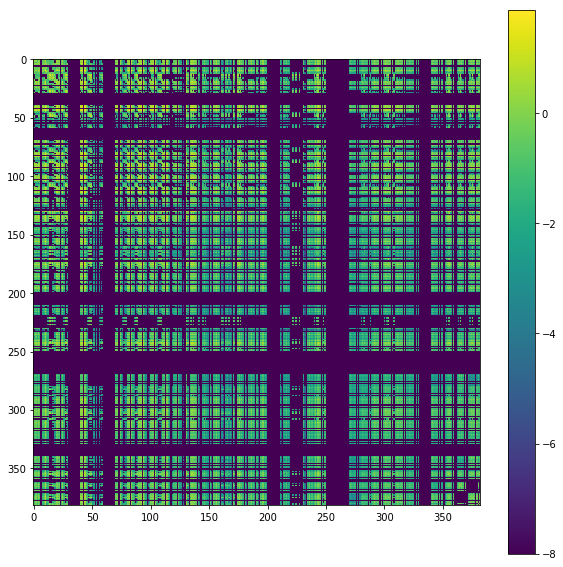

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(1e-8+np.abs(hess)))
plt.colorbar()

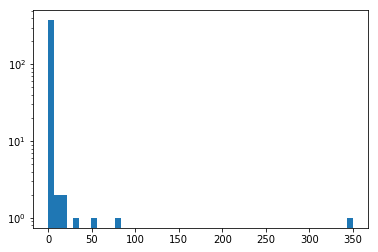

In [10]:
eigen = np.linalg.eigh(hess)[0]
plt.hist(eigen, bins=50)
plt.yscale('log', nonposy='clip')

In [11]:
hess_test = calculate_hessian(loss_test, model)

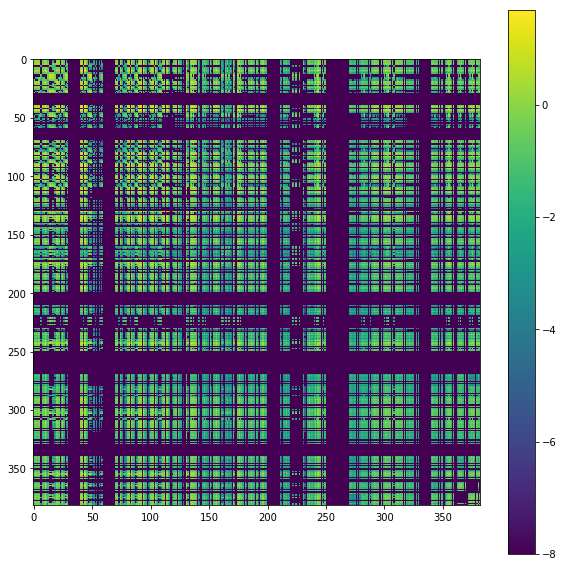

In [57]:
plt.figure(figsize=(10,10))
# plt.imshow(hess_test)
plt.imshow(np.log10(1e-8+np.abs(hess_test)))
plt.colorbar()

In [13]:
print(np.sum(eigen))
print(np.sum(eigen[-30:]))

599.9668
598.4057


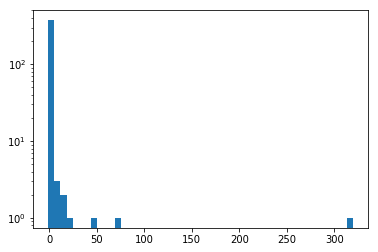

In [14]:
eigen_test = np.linalg.eigh(hess_test)[0]
plt.hist(eigen_test, bins=50)
plt.yscale('log', nonposy='clip')

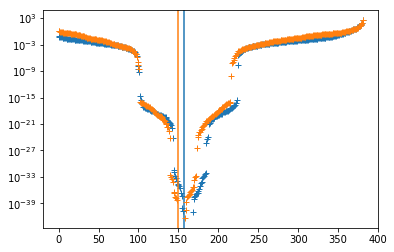

In [15]:
# plt.figure(figsize=(10,10))
plt.plot(np.abs(eigen), '+')
plt.axvline(np.sum(eigen<0), color='C0', linestyle='solid')
plt.plot(np.abs(eigen_test), '+')
plt.axvline(np.sum(eigen_test<0), color='C1', linestyle='solid')
plt.yscale('log')

In [16]:
def frob_sim(A,B):
    normA = np.sqrt(np.trace(A.T@A))
    normB = np.sqrt(np.trace(B.T@B))
    prodAB = np.trace(A.T@B)
    return prodAB/(normA*normB)

In [17]:
frob_sim(hess, hess_test)

0.98166865

In [18]:

def calculate_covariance(x, y, model, noise=0.0):
    n_param = sum(p.numel() for p in model.parameters())
    cov = torch.zeros(n_param, n_param)
    for t in range(x.size(0)):
        x[t] = x[t] + torch.randn(x[t].size())*noise
#         print(x[t].unsqueeze(0).size())
        y_pred = model(x[t].unsqueeze(0))
        loss = loss_fn(y_pred, y[t].unsqueeze(0))
#         print(loss)
#     for x, y in loader:
#         y_pred = model(x)
#         loss += loss_fn(y_pred, y)
        
        grads = torch.autograd.grad(loss, model.parameters())
        grads = torch.cat([g.view(-1) for g in grads])
        optimizer.zero_grad()
        cov += torch.ger(grads, grads).detach()

    return np.array(cov)/x.size(0)

def compute_trh1c(loader, x, y, model,):
    return

In [19]:
noise = 0
cov = calculate_covariance(x, y, model, noise)
cov_test = calculate_covariance(x_test, y_test, model)

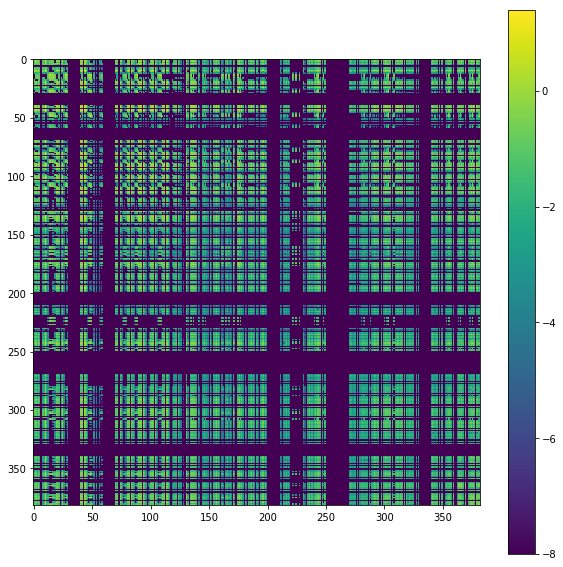

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(1e-8+np.abs(cov)))
plt.colorbar()

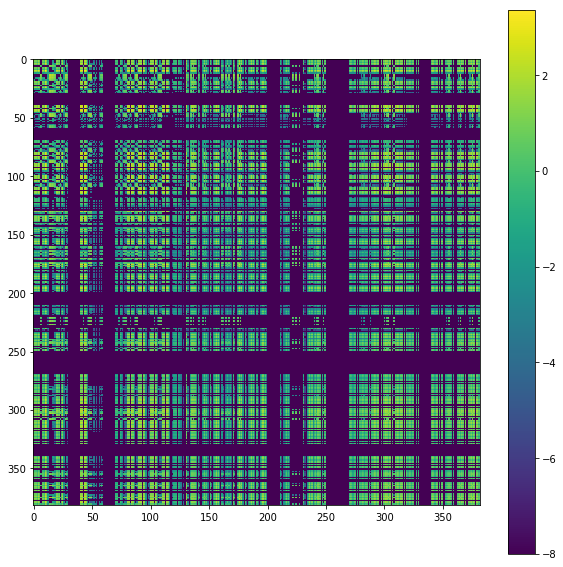

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(1e-8+np.abs(cov_test)))
plt.colorbar()

In [22]:
frob_sim(cov, cov_test)

0.88654834

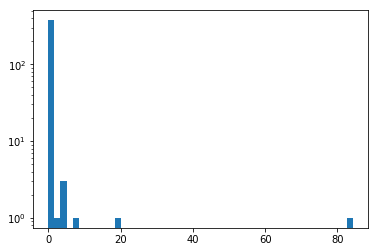

In [23]:
plt.hist(np.linalg.eigh(cov)[0], bins=50)
plt.yscale('log', nonposy='clip')
# plt.xscale('symlog', nonposy='clip')
# plt.xscale('log')

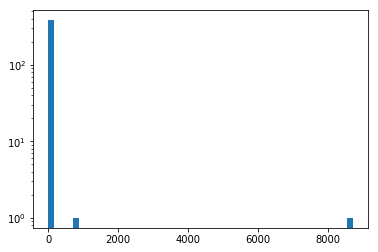

In [24]:
plt.hist(np.linalg.eigh(cov_test)[0], bins=50)

plt.yscale('log', nonposy='clip')

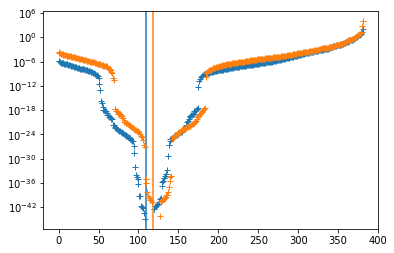

In [25]:
eigen_cov = np.linalg.eigvalsh(cov)
eigen_cov_test = np.linalg.eigvalsh(cov_test)

# plt.semilogy(eigen_cov, '+')
plt.plot(np.abs(eigen_cov), '+')
plt.axvline(np.sum(eigen_cov<0), color='C0', linestyle='solid')
plt.plot(np.abs(eigen_cov_test), '+')
plt.axvline(np.sum(eigen_cov_test<0), color='C1', linestyle='solid')
plt.yscale('log')


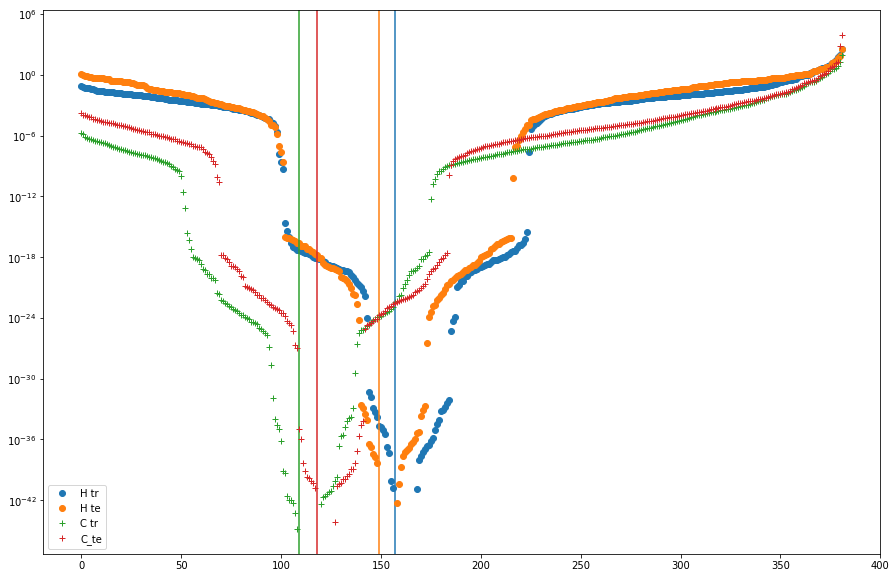

In [26]:
plt.figure(figsize=(15,10))
plt.plot(np.abs(eigen), 'o', label='H tr')
plt.axvline(np.sum(eigen<0), color='C0', linestyle='solid')
plt.plot(np.abs(eigen_test), 'o', label='H te')
plt.axvline(np.sum(eigen_test<0), color='C1', linestyle='solid')
plt.plot(np.abs(eigen_cov), '+', label='C tr')
plt.axvline(np.sum(eigen_cov<0), color='C2', linestyle='solid')
plt.plot(np.abs(eigen_cov_test), '+', label='C_te')
plt.axvline(np.sum(eigen_cov_test<0), color='C3', linestyle='solid')
plt.legend()
plt.yscale('log')

In [27]:
h1c = np.linalg.pinv(hess, rcond=1e-4)@cov/N
h1c_test = (np.linalg.pinv(hess_test, rcond=1e-4)@cov_test)/N

In [28]:
frob_sim(cov, hess)

0.95285064

In [29]:
frob_sim(cov_test, hess_test)

0.7741331

In [30]:
frob_sim(hess_test, hess)

0.98166865

In [31]:
frob_sim(cov_test, cov)

0.88654834

In [32]:
frob_sim(np.linalg.pinv(hess, rcond=1e-3), np.linalg.pinv(hess_test, rcond=1e-3))

0.19276078

In [33]:
frob_sim(h1c, h1c_test)

-0.038772948

In [34]:
print(np.trace(h1c))
print(np.trace(h1c_test))
print((loss_test-loss).item())

0.014769299
1.3725296
0.12387120723724365


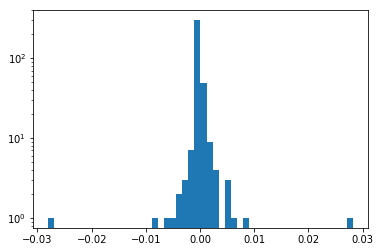

In [35]:
plt.hist(np.linalg.eigvalsh(h1c), bins=50)
plt.yscale('log')

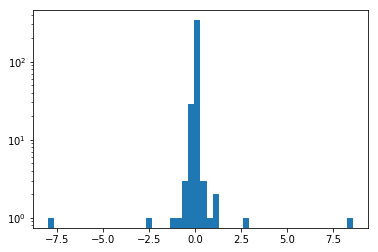

In [36]:
plt.hist(np.linalg.eigvalsh(h1c_test), bins=50)
plt.yscale('log')
# plt.yscale('symlog')

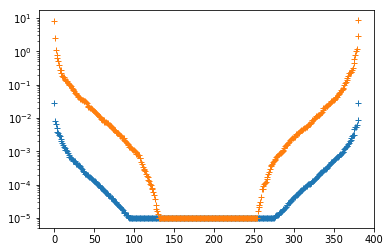

In [37]:
plt.plot(np.clip(np.abs(np.linalg.eigvalsh(h1c)), 1e-5, 1000), '+')
plt.plot(np.clip(np.abs(np.linalg.eigvalsh(h1c_test)), 1e-5, 1000), '+')
plt.yscale('log')

In [38]:
print(np.trace(h1c))
print(np.trace(h1c_test))
print((loss_test-loss).item())

0.014769299
1.3725296
0.12387120723724365


In [39]:
loss_test.item()

0.6380401849746704

In [40]:
loss.item()

0.5141689777374268

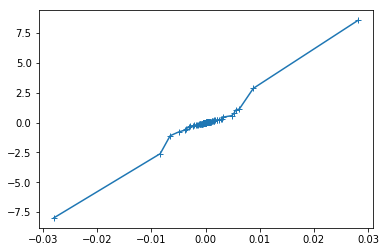

In [41]:
plt.plot(np.linalg.eigvalsh(h1c), np.linalg.eigvalsh(h1c_test), '-+')


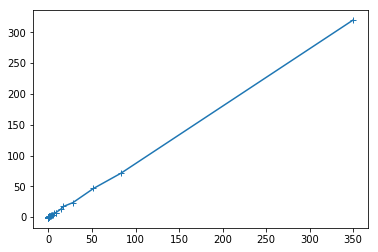

In [42]:
plt.plot(np.linalg.eigvalsh(hess), np.linalg.eigvalsh(hess_test), '-+')

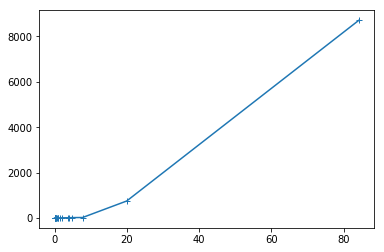

In [43]:
plt.plot(np.linalg.eigvalsh(cov), np.linalg.eigvalsh(cov_test), '-+')

In [44]:
def pr(M):
    sigma_vals = np.abs(np.linalg.eigvalsh(M))
    return np.sum(sigma_vals)**2/np.sum(sigma_vals**2)

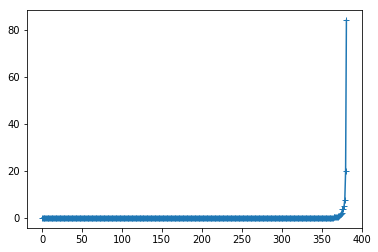

In [45]:
plt.plot(np.linalg.eigvalsh(cov), '-+')

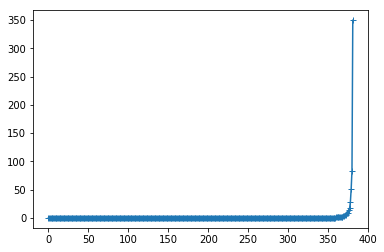

In [46]:
plt.plot(np.linalg.eigvalsh(hess), '-+')

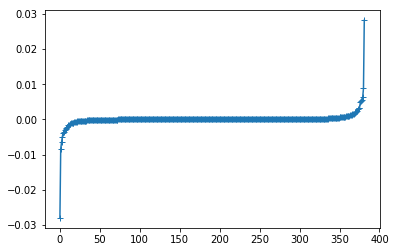

In [47]:
plt.plot(np.linalg.eigvalsh(h1c), '-+')

In [48]:
print(pr(hess))
print(pr(hess_test))
print(pr(cov))
print(pr(cov_test))

2.71342273488532
2.9300215761411814
2.3248752801127432
1.185012914918453


In [49]:
print(pr(h1c))
print(pr(h1c_test))
print(n_param)

18.240097924461946
8.521949679177746
382


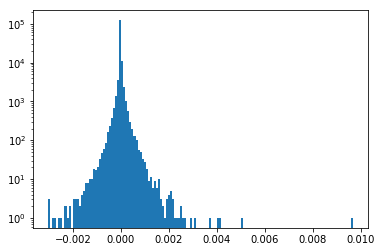

In [50]:
plt.hist(h1c.reshape(-1, 1), bins=150)
plt.yscale('log')

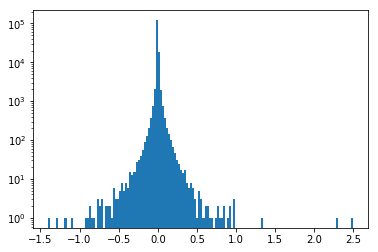

In [51]:
plt.hist(h1c_test.reshape(-1, 1), bins=150)
plt.yscale('log')

In [52]:
np.trace(h1c)*N/n_param

0.01933154313586145

In [53]:
np.trace(h1c_test)*N/n_param

1.7965047459327739

In [54]:
np.sum(np.linalg.eigvalsh(h1c)[np.linalg.eigvalsh(h1c)>0])

0.10416233

In [55]:
trh1c_reg = lambda lan, h, c: np.trace(np.linalg.inv(h+lan**np.eye(n_param))@c)/N
trh1c_cut = lambda lan, h, c: np.trace(np.linalg.pinv(h, rcond=lan)@c)/N

In [ ]:
# vec = np.logspace(-20, -1, 20)
# plt.plot(vec, [trh1c_reg(l, hess, cov) for l in vec], label='train')
# plt.plot(vec, [trh1c_reg(l, hess_test, cov_test) for l in vec], label='test')
# plt.plot(vec, [loss_test-loss]*vec.shape[0], label='gap')
# plt.legend()
# plt.xscale('log')

In [ ]:
vec = np.logspace(-10, -1, 20)
plt.plot(vec, [trh1c_cut(l, hess, cov) for l in vec], label='train')
plt.plot(vec, [trh1c_cut(l, hess_test, cov_test) for l in vec], label='test')
plt.plot(vec, [loss_test-loss]*vec.shape[0], label='gap')
plt.legend()
plt.xscale('log')
# plt.yscale('symlog')

In [ ]:
# def eig_ratio(h, c):
#     uh, sh, vh = np.linalg.svd(h)
#     uc, sc, vc = np.linalg.svd(c)
#     return [np.trace(vh.T@np.diag(mask_inv(sh, k))@uh.T@uc@np.diag(mask(sc, k))@vc/N) for k in range(sh.shape[0])]

# mask = lambda x, k: x*(x>=x[k])

# def mask_inv(x, k):
#     res = np.zeros_like(x)
#     res[np.where(x>=x[k])] = 1/x[np.where(x>=x[k])]
#     return res

In [ ]:
# res = eig_ratio(hess, cov)

In [ ]:
# res_test = eig_ratio(hess_test, cov_test)

In [ ]:
# plt.plot(res)
# plt.plot(res_test)
# plt.plot(np.arange(n_param), [loss_test-loss]*n_param, label='gap')
# plt.yscale('symlog')

In [ ]:
eig_h_tr = np.linalg.eigvalsh(hess)
eig_h_te = np.linalg.eigvalsh(hess_test)

In [ ]:
np.sum(eig_h_tr>0)/eig_h_tr.size

In [ ]:
np.sum(eig_h_te>0)/eig_h_te.size

In [ ]:
np.sum(eigen_cov>0)/eigen_cov.size

In [ ]:
np.sum(eigen_cov_test>0)/eigen_cov.size

In [ ]:
eigen_h1c = np.linalg.eigvalsh(h1c)
eigen_h1c_test = np.linalg.eigvalsh(h1c_test)
print(np.sum(eigen_h1c>0)/eigen_cov.size)
print(np.sum(eigen_h1c_test>0)/eigen_cov.size)

In [ ]:
eigen_cov[-1]/eig_h_tr[-1]

In [ ]:
eigen_cov_test[-1]/eig_h_te[-1]

In [ ]:
np.sum(eigen_cov_test/(eig_h_te+1e-5))

In [ ]:
np.sum(eigen_cov/(eig_h_tr+1e-5))

In [ ]:
neuman = np.linalg.pinv(np.eye(*hess.shape) - lr**2*hess@hess)

In [ ]:
np.trace(neuman@cov)*lr**2/4

In [ ]:
np.max(eigen_cov)*lr